# An ensemble effect

In [231]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng

In [232]:
# read dataset data csv and save output as numpy array
y = np.loadtxt('gen.csv', skiprows=1)

In [233]:
# Verify proper loading and even distribution of outputs
np.unique(y, return_counts=True)

(array([0., 1.]), array([800, 800], dtype=int64))

In [234]:
n = len(y) # number of values

p = 0.1 
rng = np.random.default_rng()
w = rng.choice(2, size=n, replace=True) # generates a binary vector of length n
q = n*p
alpha = rng.choice(n, size=int(q), replace=False) # creates the set of indices
w[alpha] = y[alpha] # gives w the q correct predictions

accuracy = sum(w == y)/n # calculate prediction for a single "weak" model
print(f'Model accuracy for a single "weak" model: {accuracy:.2%}')

Model accuracy for a single "weak" model: 55.81%


### Task a. Generate an ensemble of 100 w with p = 0:1. What is the accuracy of the ensemble in predicting y?

In [235]:
p = 0.1
q = n*p
model = np.zeros([n,100], dtype=int) # define empty ensemle model

for i in range(100):
    w = rng.choice(2, size=n, replace=True) # generates a binary vector of length n
    alpha = rng.choice(n, size=int(q), replace=False) # creates the set of indices
    w[alpha] = y[alpha] # gives w the q correct predictions
    model[:, i] = w
y_pred = np.median(model, axis=1) # calculate model predictions
y_pred = y_pred.astype(int) # convert values to integers in range [0,1] in case of median of 0.5

accuracy = sum(y_pred == y)/n # calculate accuracy for single model
print(f'Model Accuracy for an ensemble of 100 "weak" models: {accuracy:.2%}')

Model Accuracy for an ensemble of 100 "weak" models: 83.50%


We clearly see huge improvement in model accuracy comparing to a single "weak" model

### If p = 0.05, how many w are needed in the ensemble in order to surpass an accuracy of 0.9?

In [236]:
# Implentation of w model using partly example code from Assignment 3 Exercise 3

# Define intial values
p = 0.05
q = n*p
model = np.empty((n,0))
accuracy = 0

while accuracy < 0.9:
    w = rng.choice(2, size=n, replace=True) # generates a binary vector of length n
    alpha = rng.choice(n, size=int(q), replace=False) # creates the set of indices
    w[alpha] = y[alpha] # gives w the q correct predictions
    model = np.append(model, w.reshape(-1, 1), axis = 1)
    y_pred = np.median(model, axis=1) # calculate model predictions
    y_pred = y_pred.astype(int) # convert values to integers in range [0,1] in case of median of 0.5
    accuracy = sum(y_pred == y)/n # calculate accuracy for model ensembler

print(f'In order to obtain an accuracy of 90% we require {model.shape[1]} "weak" models')

In order to obtain an accuracy of 90% we require 643 "weak" models


### If you have five w, what seems to be a sufficient value for p in order to have a prediction accuracy above 0.95?

In [237]:
# Implentation of w model using partly example code from Assignment 3 Exercise 3

# Define intial values
p = 0.01
q = n*p
model = np.zeros((n,5)) # define empty ensemle model with 5 columns for 5 simple models
accuracy = 0

while accuracy < 0.95:
    q = n*p
    for i in range(5):
        w = rng.choice(2, size=n, replace=True) # generates a binary vector of length n
        alpha = rng.choice(n, size=int(q), replace=False) # creates the set of indices
        w[alpha] = y[alpha] # gives w the q correct predictions
        model[:, i] = w
    y_pred = np.median(model, axis=1)
    y_pred = y_pred.astype(int) # convert values to integers in range [0,1] in case of median of 0.5
    accuracy = sum(y_pred == y)/n # calculate accuracy for model ensembler
    p += 0.01

print(f'In order to obtain an accuracy of 95% we require value of "p" larger or equal to {round(p, 3)}')

In order to obtain an accuracy of 95% we require value of "p" larger or equal to 0.64


### Plot for the case p = 0.3, and the sizes 3,5,10,20,50 of the ensembles.

In [238]:
# define funtion to calculate accuracy based on number of ensembles

def accuracy (m):
    n = len(y)
    p = 0.3
    q = n*p
    model = np.zeros((n,m)) # define empty ensemle model
    accuracy = 0

    for i in range(m):
        w = rng.choice(2, size=n, replace=True) # generates a binary vector of length n
        alpha = rng.choice(n, size=int(q), replace=False) # creates the set of indices
        w[alpha] = y[alpha] # gives w the q correct predictions
        model[:, i] = w
    y_pred = np.median(model, axis=1)
    y_pred = y_pred.astype(int) # convert values to integers in range [0,1] in case of median of 0.5
    accuracy = sum(y_pred == y)/n # calculate accuracy for model ensembler
    score = accuracy.astype(float)
    return score

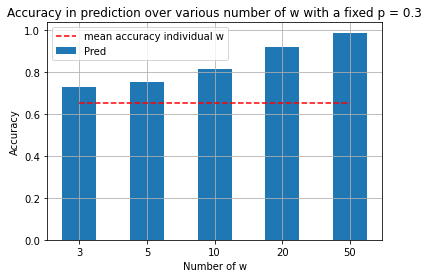

In [239]:
# Plot the chart

# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

m_quantity = [3, 5, 10, 20, 50]
x_pos = [1, 3, 5, 7, 9] # define x positions

# Calculate mean score for individual w using 100 single models
single_score = []

for i in range (1, 101):
    single_score.append(accuracy(1))
single_score_mean = np.mean(single_score)

# extend mean score to be used in plot later
single_score_mean = np.repeat(single_score_mean, len(m_quantity))


score = []
for m in m_quantity:
    score.append(accuracy(m)) # define score for various values of m

x = np.arange(len(m_quantity))  # the label locations
width = 1  # the width of the bars

fig, ax = plt.subplots()
ax_1 = ax.bar(x_pos, score, width, label='Pred')
ax_2 = ax.plot(x_pos, single_score_mean, 'r--', label='mean accuracy individual w')

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy in prediction over various number of w with a fixed p = 0.3')
ax.set_xlabel('Number of w')
plt.xticks(x_pos, m_quantity) # Create names on the x-axis
ax.legend()

plt.grid()
plt.show()